In [4]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import json
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

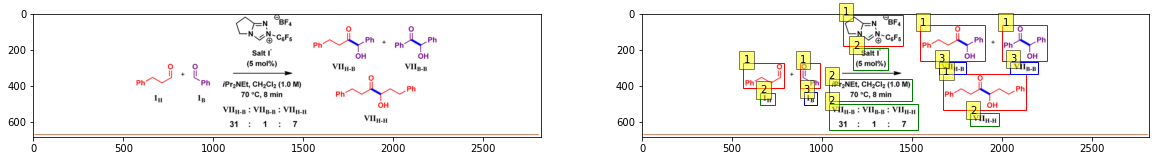

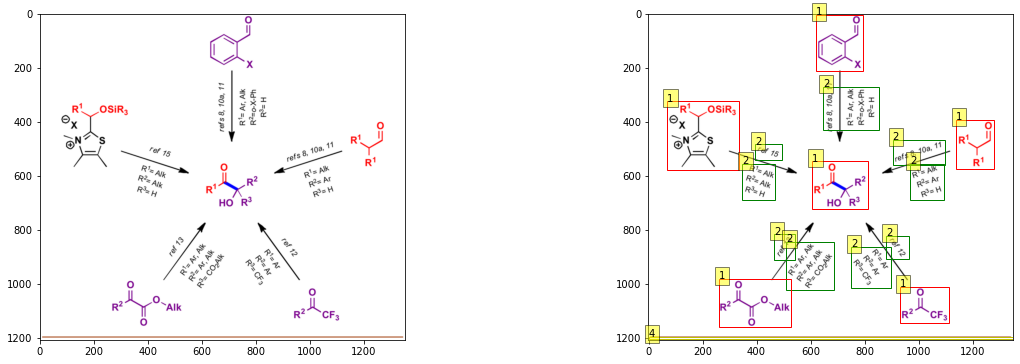

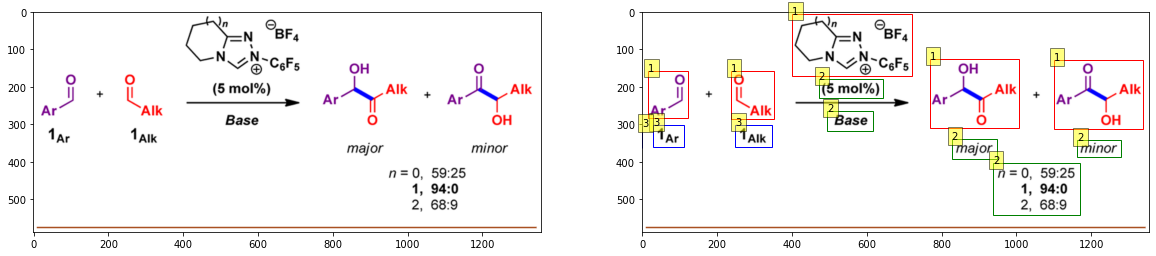

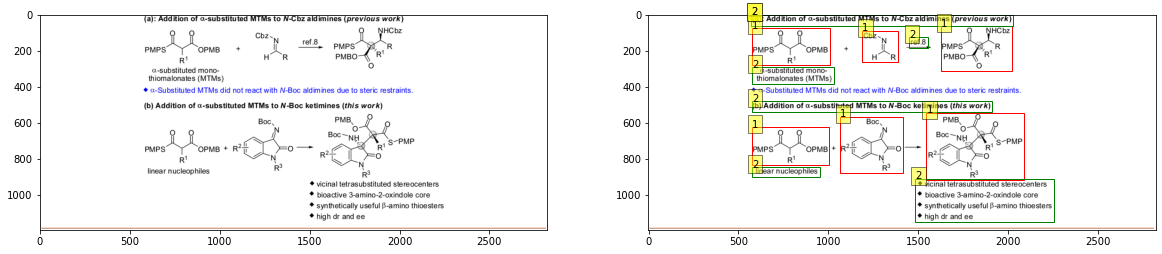

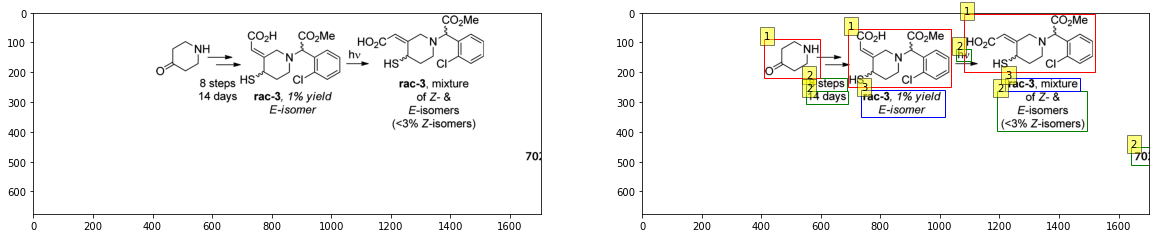

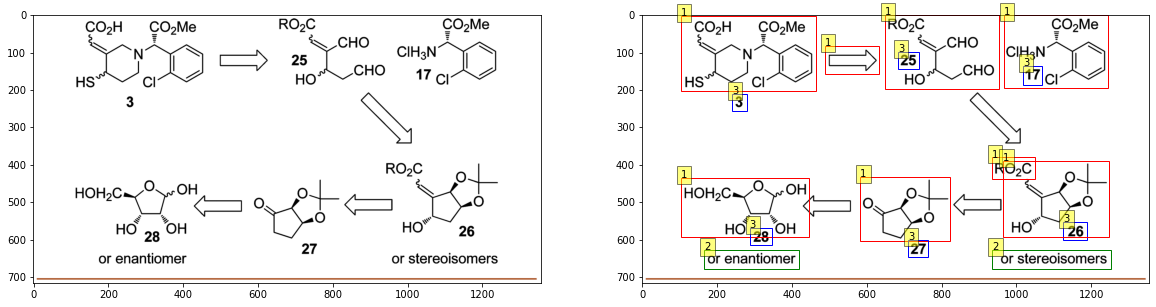

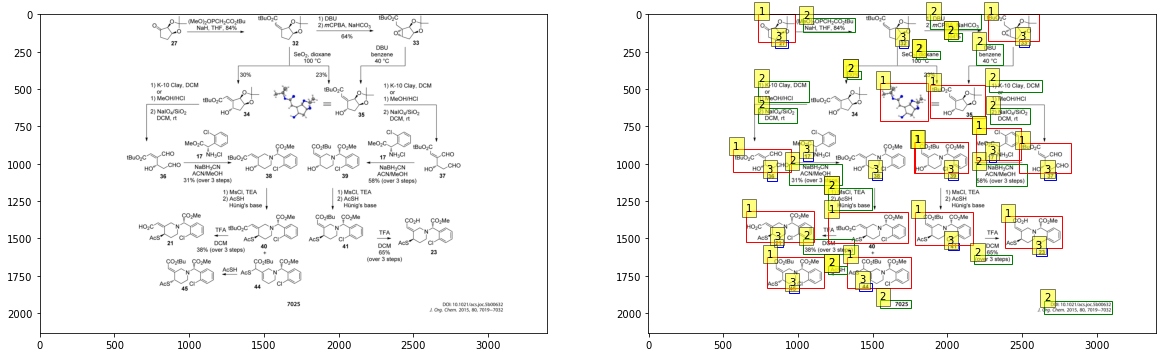

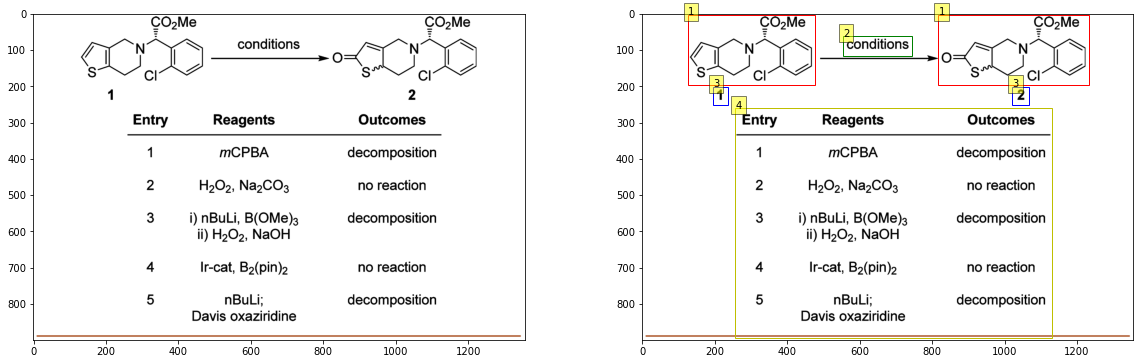

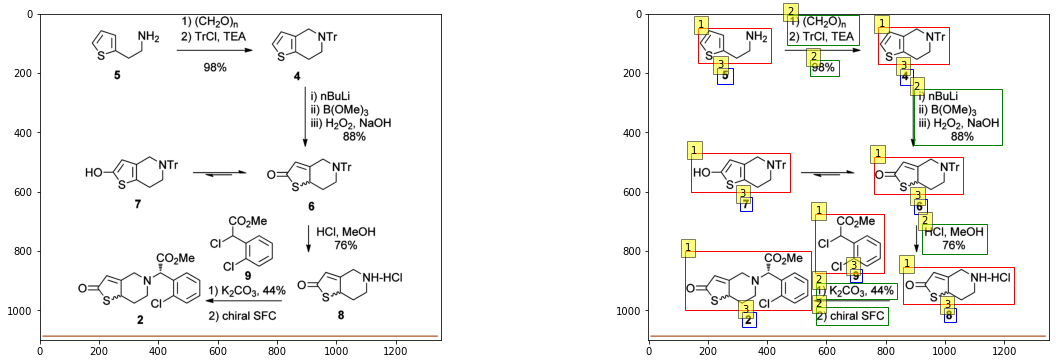

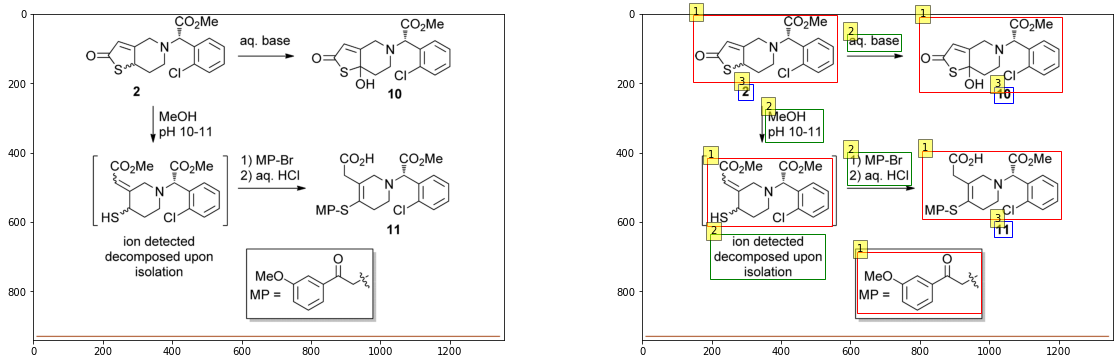

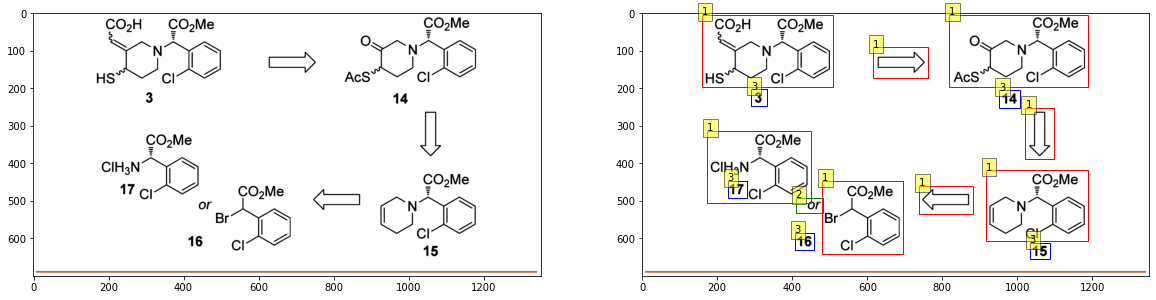

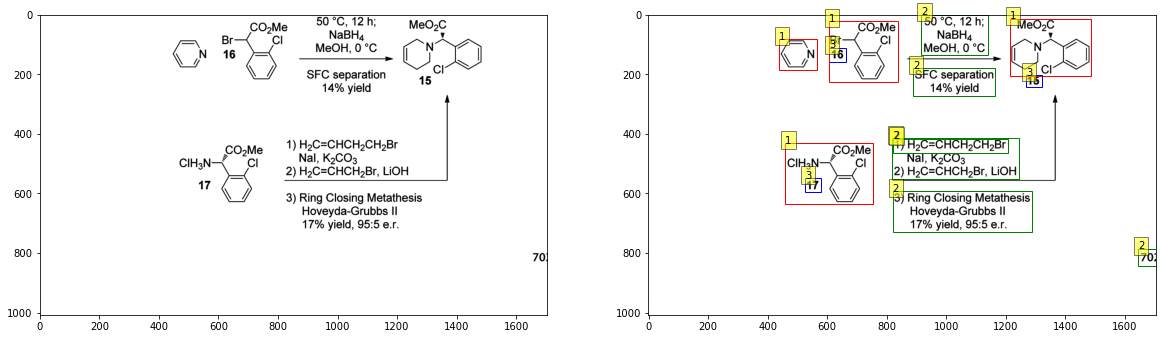

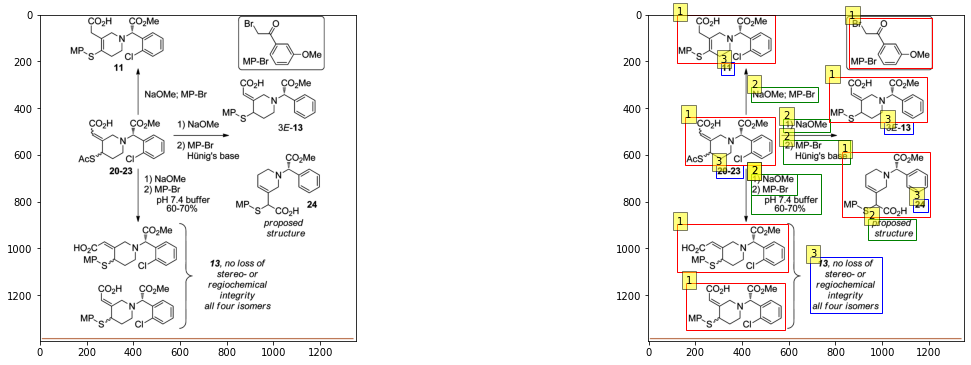

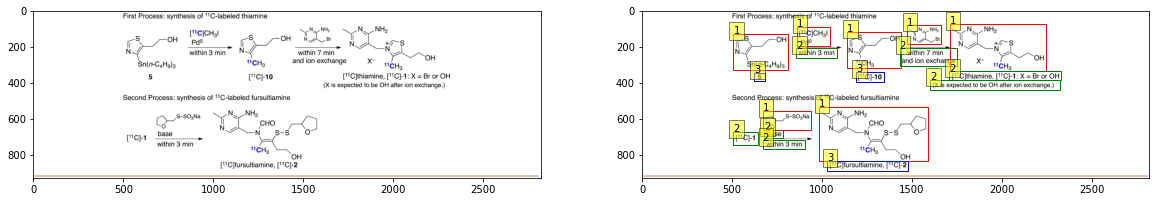

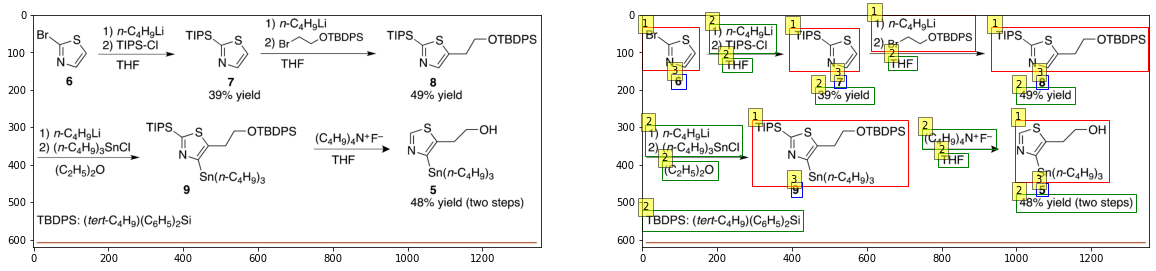

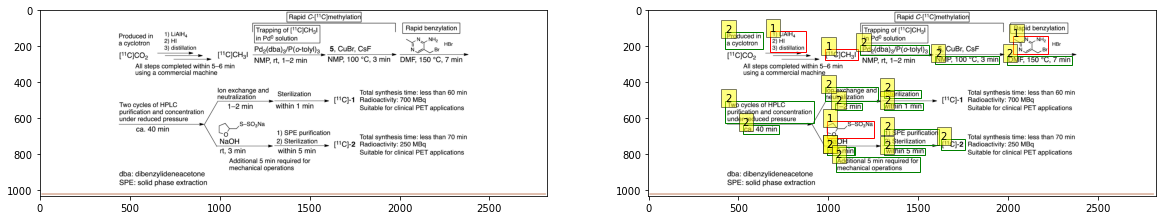

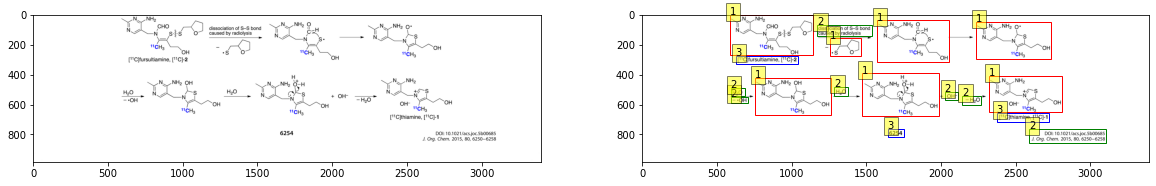

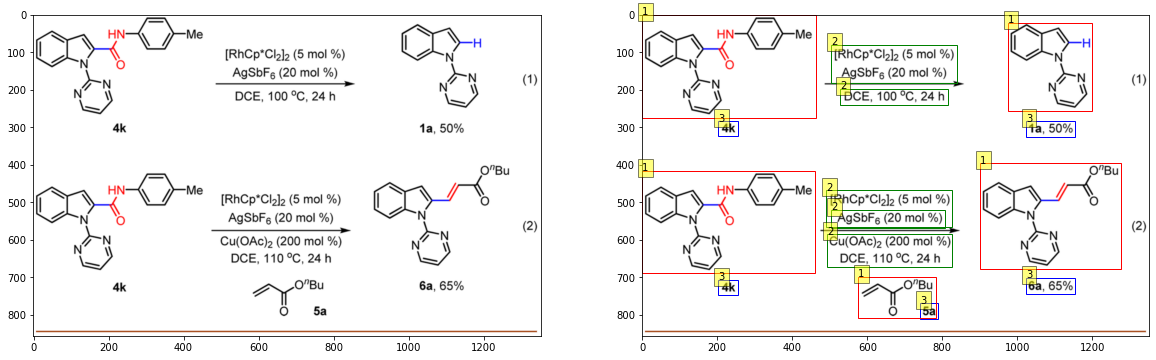

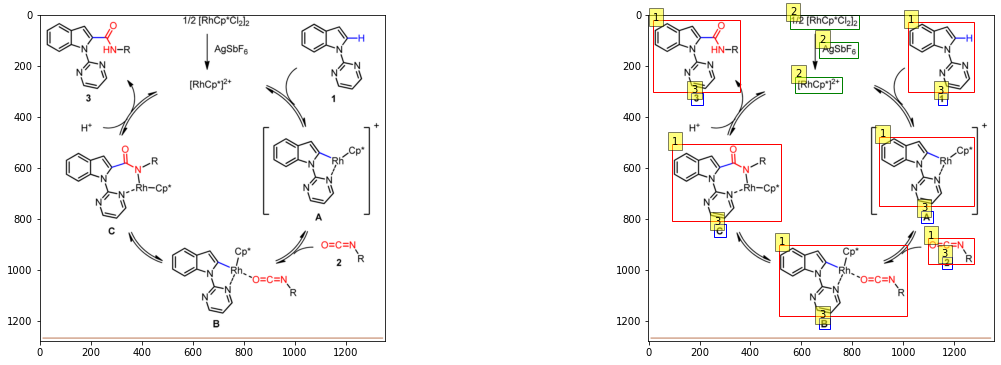

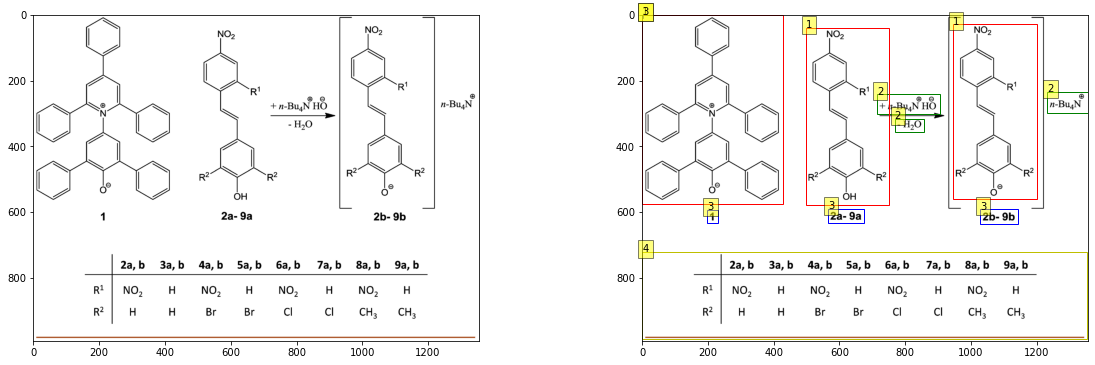

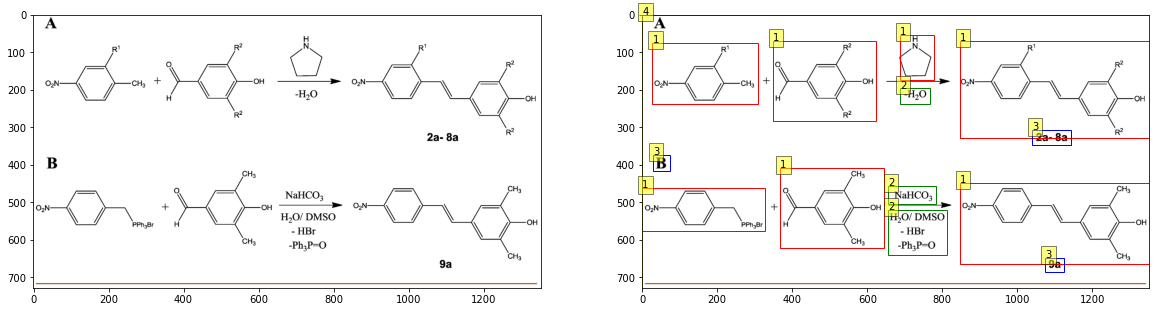

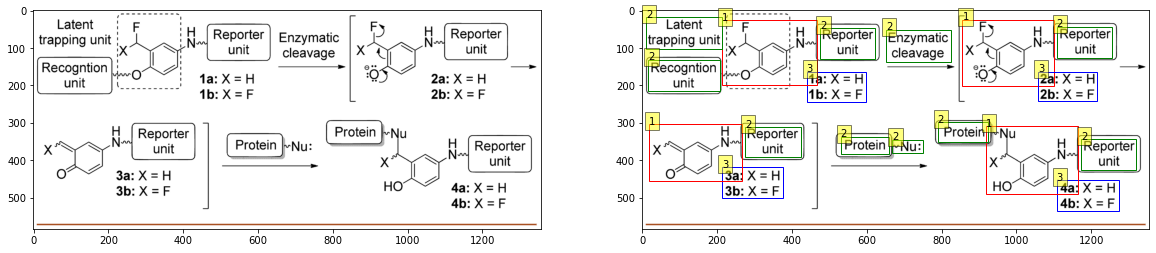

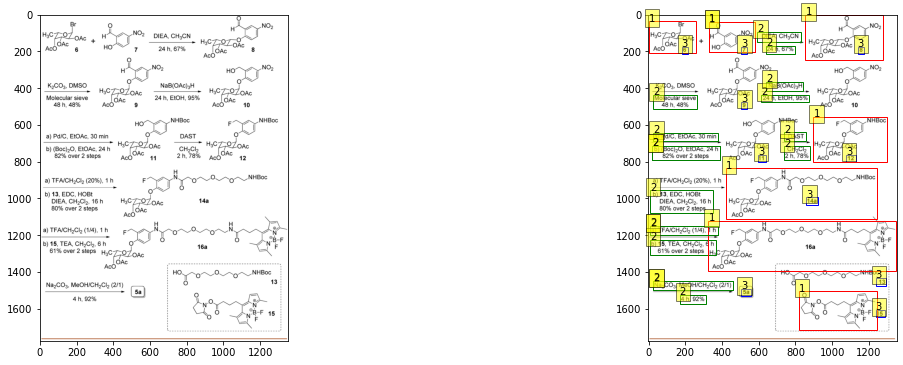

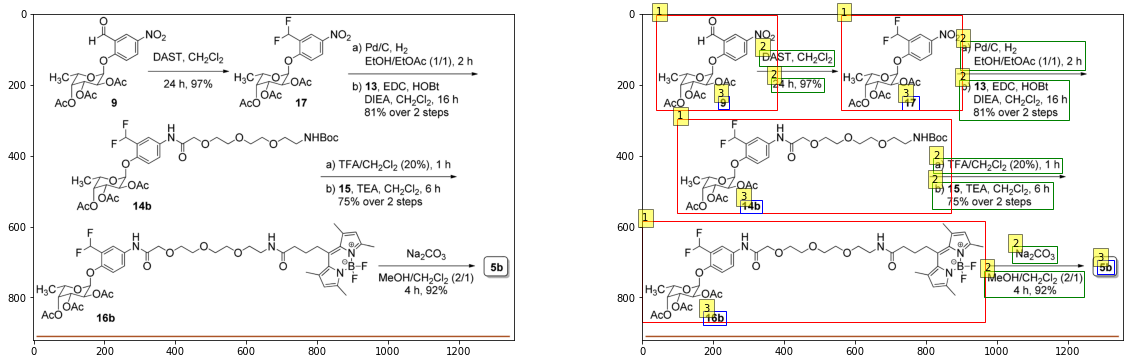

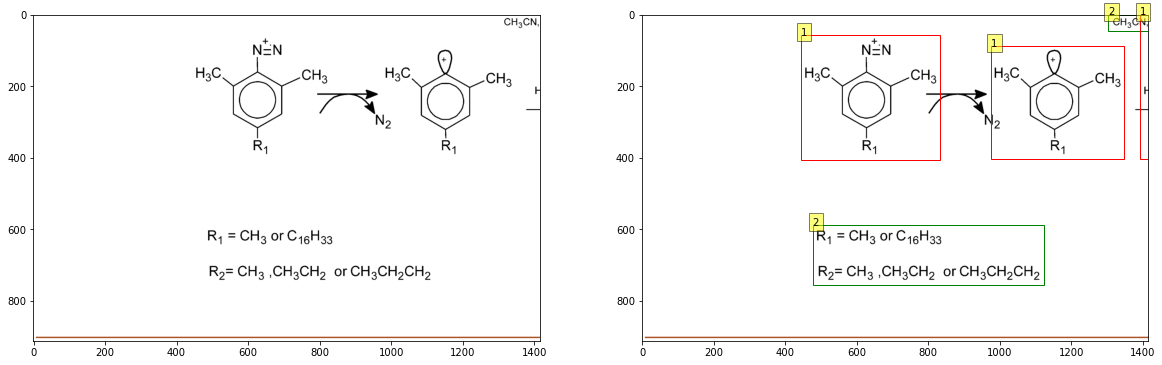

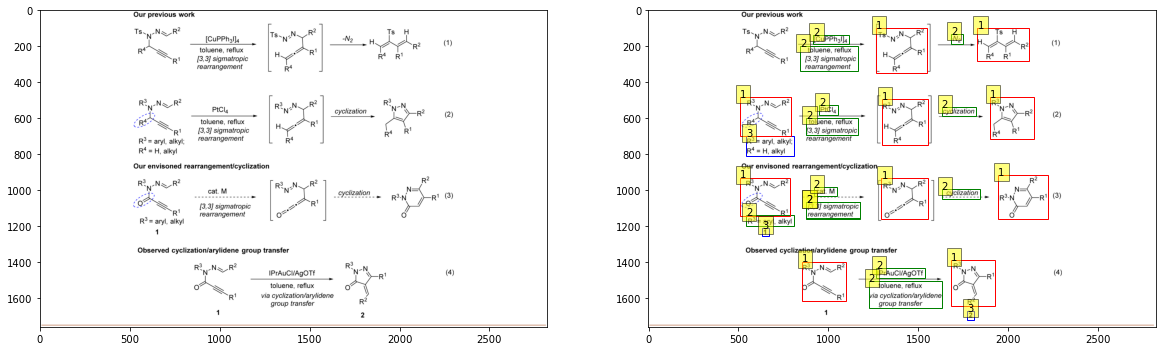

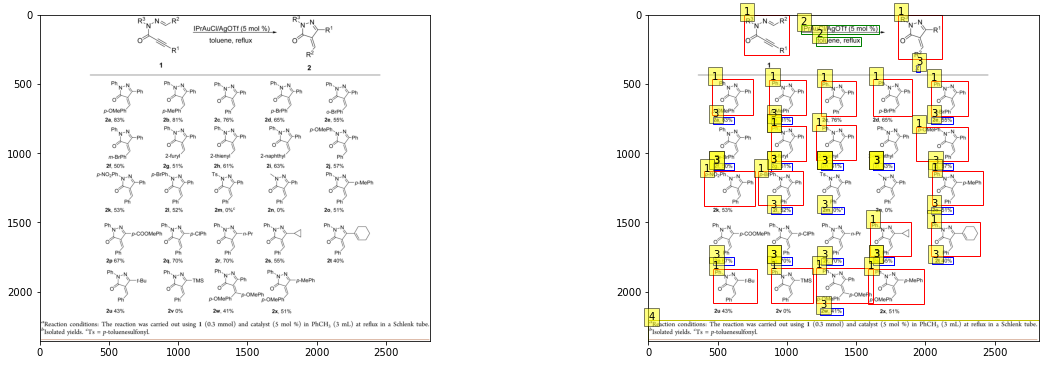

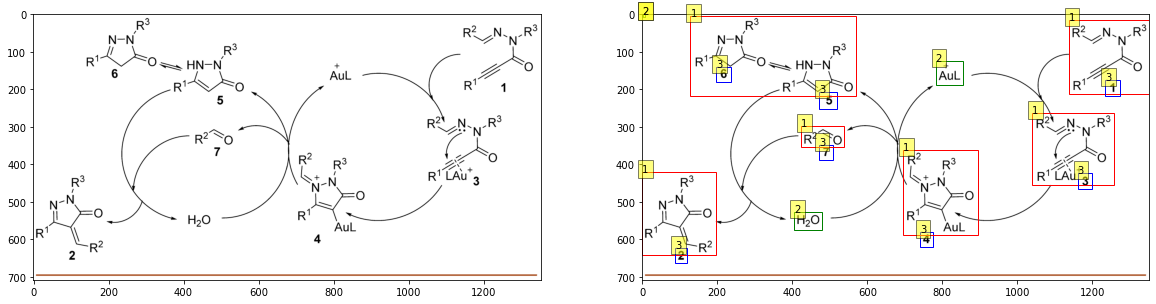

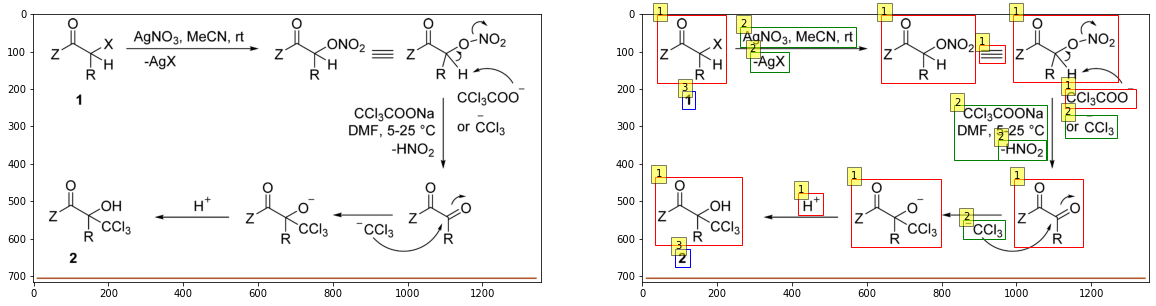

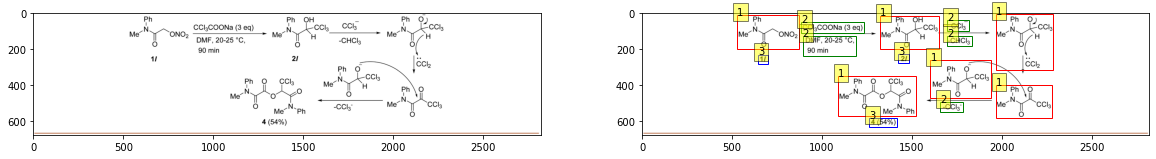

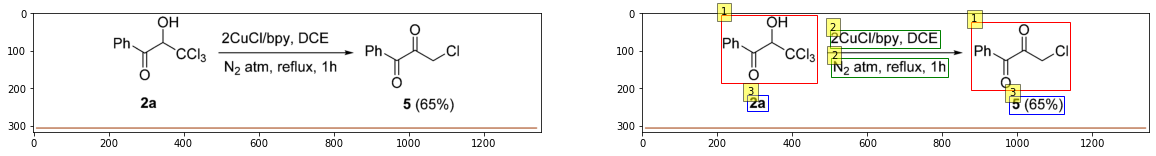

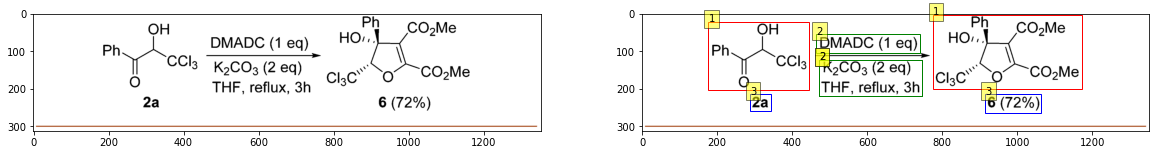

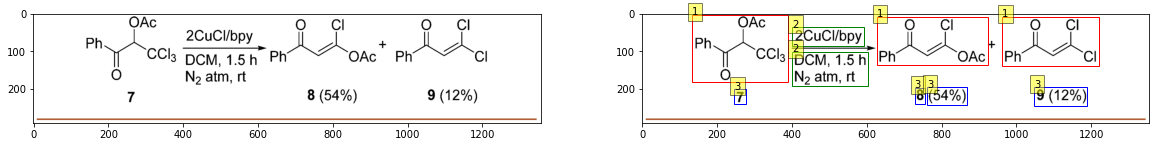

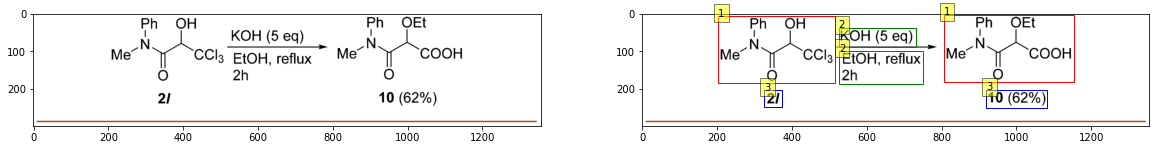

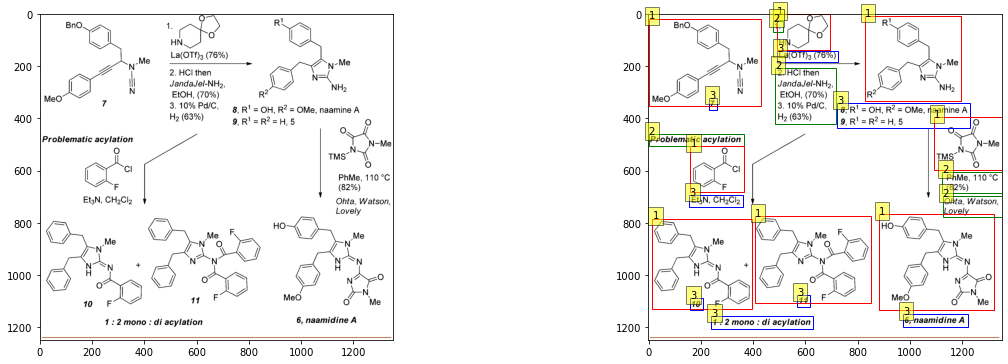

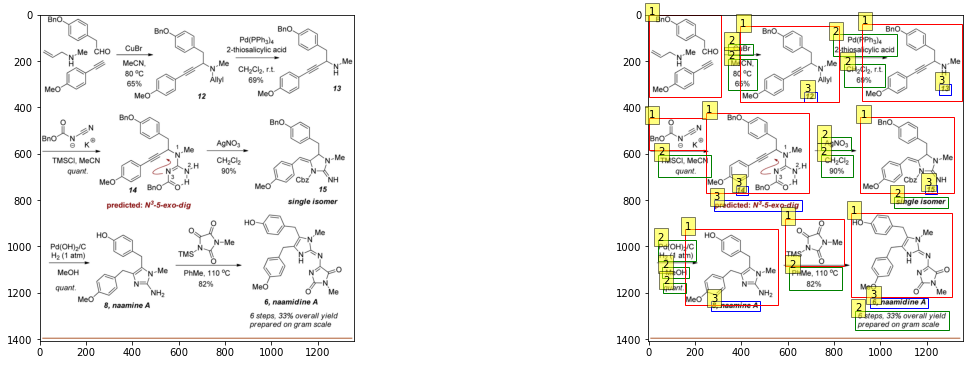

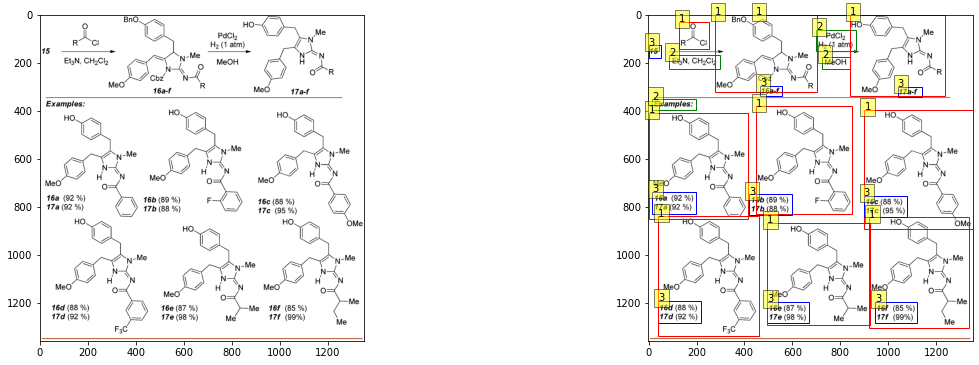

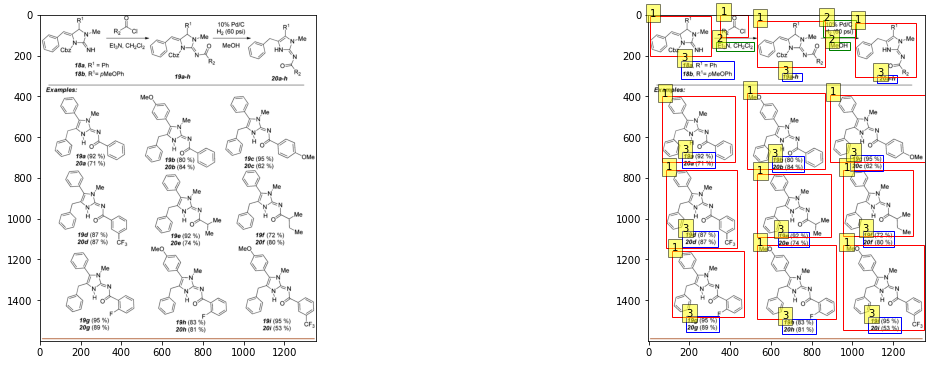

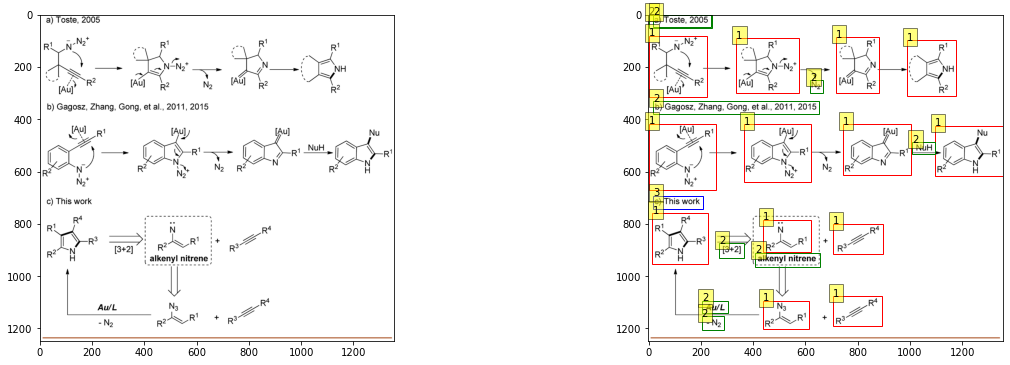

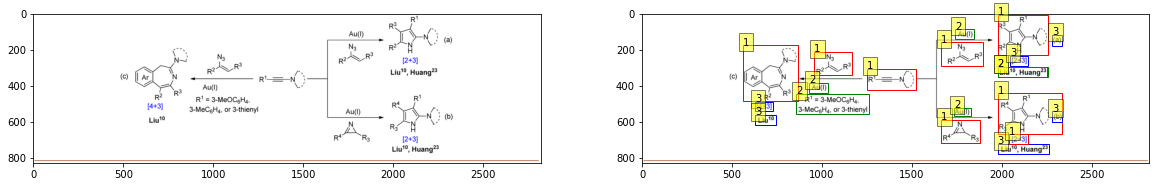

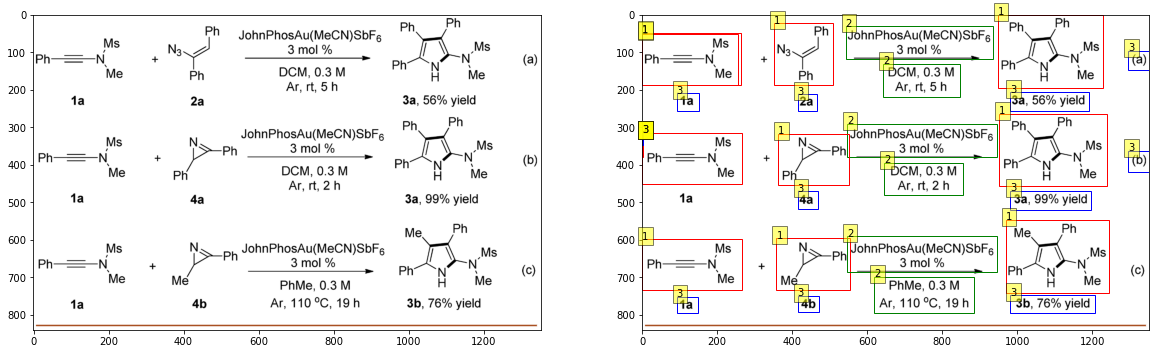

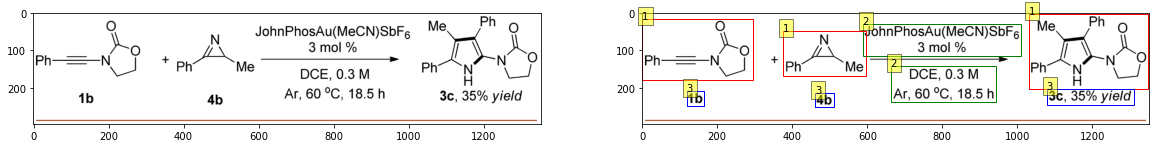

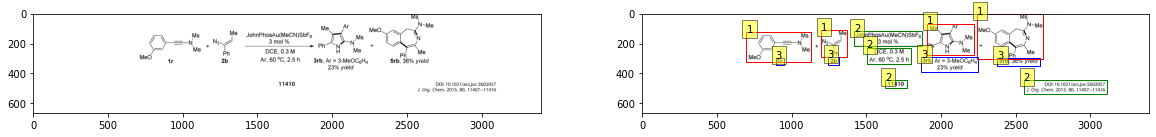

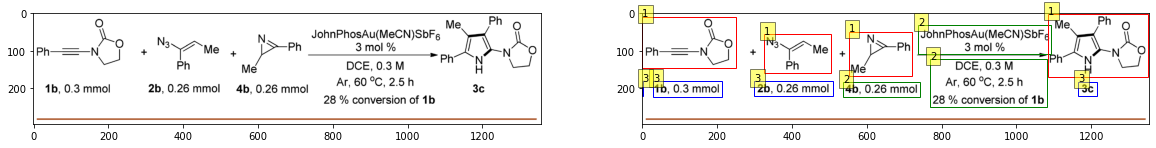

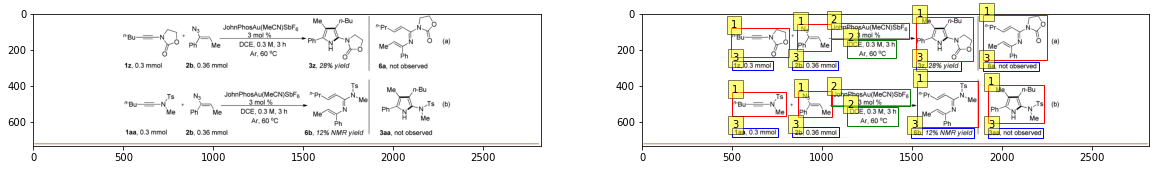

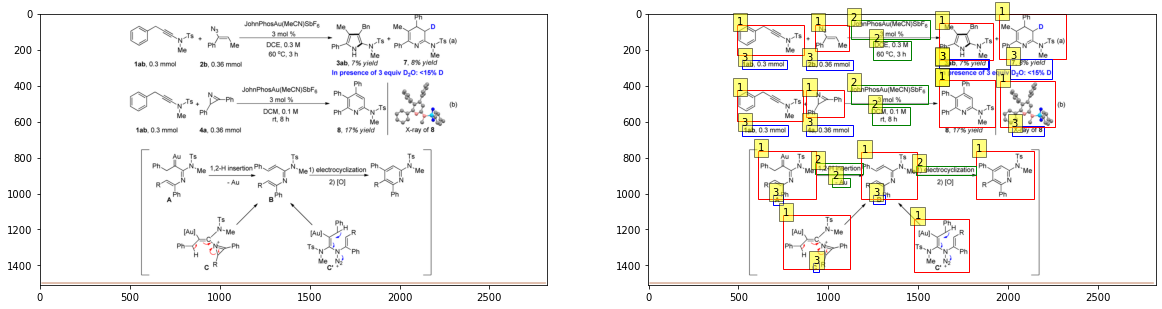

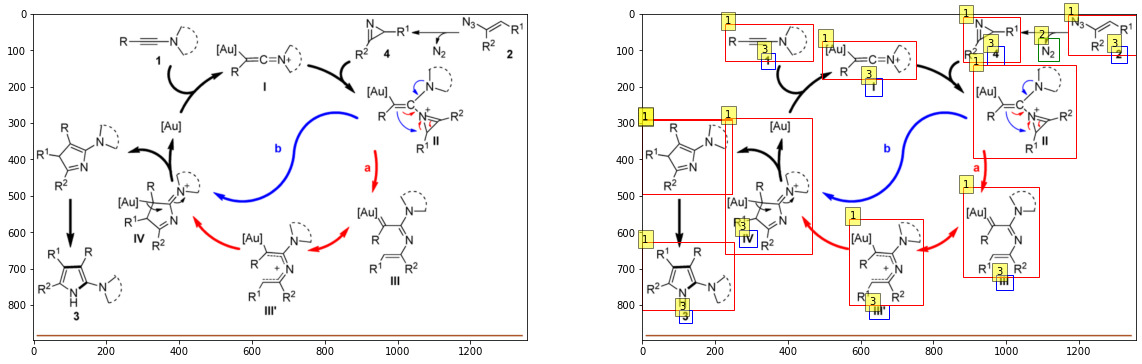

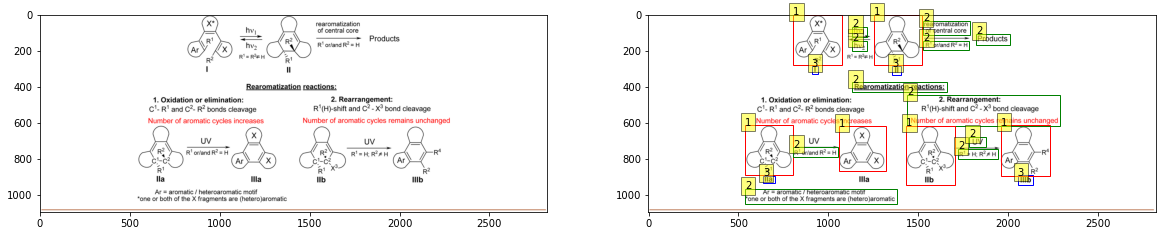

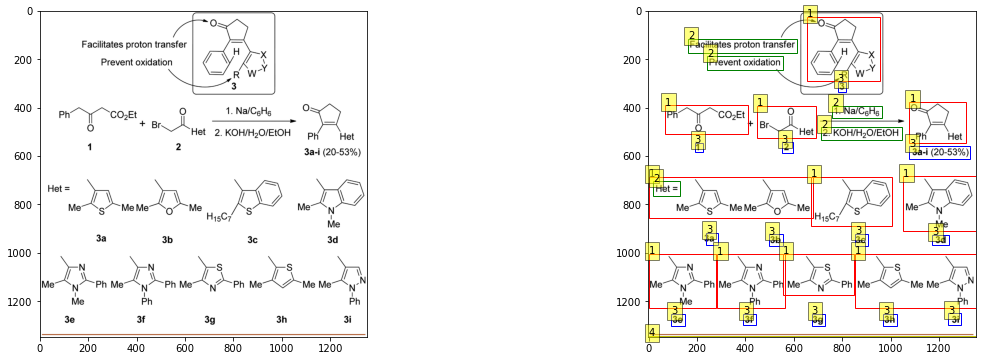

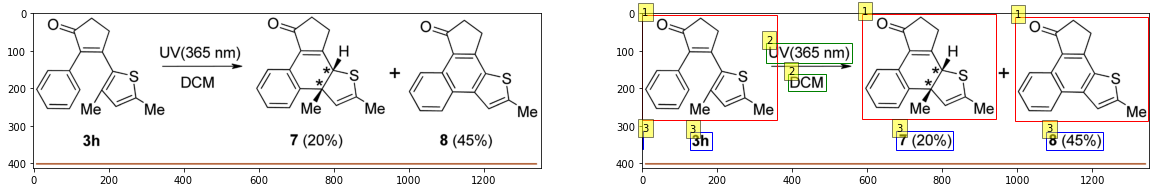

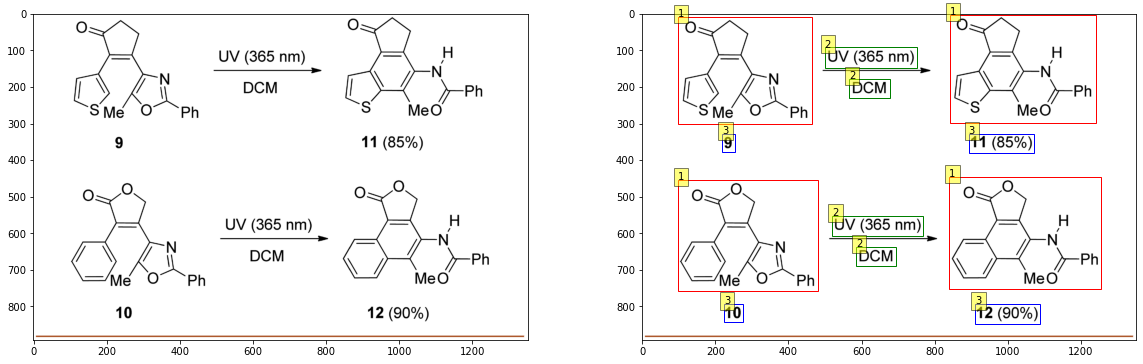

In [7]:
from reaction.data import ImageData, get_bboxes_match

image_base = '../preprocess/images/'
data_path = '../preprocess/scheme.json'
pred_path = '../preprocess/prediction_scheme.json'

with open(data_path) as f:
    data = json.load(f)
with open(pred_path) as f:
    predictions = json.load(f)

cnt = 0
for idx, image_data in enumerate(data['images']):
    path = image_base + image_data['file_name']
    img = cv2.imread(path)
    height, width, _ = img.shape
    if 'bbox' in predictions:
        bboxes = predictions['bbox'][idx]
        d = ImageData(image_data, bboxes)
        fig, axes = plt.subplots(1, 2, figsize=(20, 6))
        d.draw_gold(axes[0], img)
        d.draw_prediction(axes[1], img)
    plt.show()
    cnt += 1
    if cnt > 50:
        break